In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Background
---
This project is a practice of an Life Style Dataset and in this notebook I'll do an exploratory analysis of the data and answer the following questions:
1. Which lifestyle factors show the strongest correlation with overall health or happiness?
2. How do age and gender influence health-related behaviors and outcomes?
3. Are there any significant differences in stress levels among people with different activity levels or diets?
4. Can we detect clusters of individuals with similar lifestyle patterns?
5. What are the top 3 actionable recommendations you can give based on the data insights?

Also I would like to include the following KPIs here and in a Power BI file on the "Dashboards" folder:
1. Average Sleep Hours per Person per Week
2. Average Exercise Frequency (per week)
3. Average BMI or Health Score grouped by Lifestyle Type
4. Percentage of Respondents with Healthy Habits 
5. Happiness-to-Stress Ratio

# Guidelines

4. Insights & Interpretation
- Interpret statistical findings in plain language.
- Connect each insight with a business or health implication.

# Initial SetUp and Data cleaning
1. Initial Setup
- Import essential libraries: pandas, numpy, matplotlib.pyplot, seaborn.
- Load the CSV file and inspect its structure
- Check for data types and convert them properly (e.g., categorical variables).

2. Data Cleaning
- Handle missing or invalid values (decide between imputation or removal).
- Normalize/encode categorical features if needed.
- Remove duplicates if any.

---
## Conclusions
1. There is any null or empty field
2. The data appears to be integrated and clasified even on categorical fields such as Workout_type or Gender
3. The data info is based on people between 18 and 59 years old, and 75% of the people are under the 49 years old
4. The most important categorical fields are: Gender, Workout_Type, meal_name, meal_type, diet_type, cooking_method, Name of Exersice, Difficulty Level, Burns_calories_Bin

In [2]:
#Loading the dataset
df_raw = pd.read_csv('../data/raw/Final_data.csv')

In [3]:
#Looking for the count of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [4]:
#Look for the dataset stadistic info
df_raw.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [5]:
#Looking all the categorical fields identified by the "object" dtype
df_raw.select_dtypes(include=['object'])

,Gender,Workout_Type,meal_name,meal_type,diet_type,cooking_method,Name of Exercise,Benefit,Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,Burns_Calories_Bin
0,Male,Strength,Other,Lunch,Vegan,Grilled,Decline Push-ups,Improves shoulder health and posture,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,Medium
1,Female,HIIT,Other,Lunch,Vegetarian,Fried,Bear Crawls,Strengthens lower abs,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,High
2,Female,Cardio,Other,Breakfast,Paleo,Boiled,Dips,Builds chest strength,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,High
3,Female,HIIT,Other,Lunch,Paleo,Fried,Mountain Climbers,Improves coordination and cardiovascular health,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,High
4,Male,Strength,Other,Breakfast,Vegan,Baked,Bicep Curls,Targets obliques and improves core rotation,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,Strength,Other,Breakfast,Low-Carb,Boiled,Frog Jumps,Improves cardiovascular fitness,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Arms,Anterior,Triceps pushdowns,Medium
19996,Female,Strength,Other,Snack,Vegetarian,Boiled,Pull-ups,Strengthens back and legs,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Arms,Lats,Seated calf raises,Low
19997,Male,Strength,Other,Snack,Keto,Grilled,Dips,Builds shoulder width,"Upper Back, Rear Deltoids",Barbell,Beginner,Forearms,Wrist Extensors,Russian twists,High
19998,Male,Yoga,Other,Snack,Paleo,Roasted,Plyo Squats,Builds calf muscles,"Rear Deltoids, Upper Back",Pull-up Bar,Intermediate,Shoulders,Anterior,Leg curls,Low


In [6]:
#I look for the "meal name" unique values to know if it is worth to consider for categorical values encoding 
df_raw['meal_name'].unique()

array(['Other'], dtype=object)

In [7]:
df_raw['Name of Exercise'].nunique()

55

In [3]:
# Encoding categorical Values 
# Nominal: Gender, Workout_type, meal_type, diet_type, cooking_method
# Ordinal: Difficulty Level, Burns_Calories_Bin

nominal_cols = ['Workout_Type', 'meal_type', 'diet_type', 'cooking_method']
ordinal_difficulty = ['Difficulty Level']
ordinal_burns = ['Burns_Calories_Bin']

order_difficulty = [['Beginner', 'Intermediate', 'Advanced']]
order_burns_cal = [['Low', 'Medium', 'High', 'Very High']]

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_cols),
        ('ordinal_difficulty', OrdinalEncoder(categories=order_difficulty), ordinal_difficulty),
        ('ordinal_burns', OrdinalEncoder(categories=order_burns_cal), ordinal_burns)
    ],
    remainder='passthrough'
)

df_encoded = pd.DataFrame(
    preprocessor.fit_transform(df_raw),
    columns=preprocessor.get_feature_names_out()
)
df_encoded.columns

Index(['nominal__Workout_Type_HIIT', 'nominal__Workout_Type_Strength',
       'nominal__Workout_Type_Yoga', 'nominal__meal_type_Dinner',
       'nominal__meal_type_Lunch', 'nominal__meal_type_Snack',
       'nominal__diet_type_Keto', 'nominal__diet_type_Low-Carb',
       'nominal__diet_type_Paleo', 'nominal__diet_type_Vegan',
       'nominal__diet_type_Vegetarian', 'nominal__cooking_method_Boiled',
       'nominal__cooking_method_Fried', 'nominal__cooking_method_Grilled',
       'nominal__cooking_method_Raw', 'nominal__cooking_method_Roasted',
       'nominal__cooking_method_Steamed',
       'ordinal_difficulty__Difficulty Level',
       'ordinal_burns__Burns_Calories_Bin', 'remainder__Age',
       'remainder__Gender', 'remainder__Weight (kg)', 'remainder__Height (m)',
       'remainder__Max_BPM', 'remainder__Avg_BPM', 'remainder__Resting_BPM',
       'remainder__Session_Duration (hours)', 'remainder__Calories_Burned',
       'remainder__Fat_Percentage', 'remainder__Water_Intake (liter

In [21]:
df_encoded

,nominal__Workout_Type_HIIT,nominal__Workout_Type_Strength,nominal__Workout_Type_Yoga,nominal__meal_type_Dinner,nominal__meal_type_Lunch,nominal__meal_type_Snack,nominal__diet_type_Keto,nominal__diet_type_Low-Carb,nominal__diet_type_Paleo,nominal__diet_type_Vegan,...,remainder__BMI_calc,remainder__cal_from_macros,remainder__pct_carbs,remainder__protein_per_kg,remainder__pct_HRR,remainder__pct_maxHR,remainder__cal_balance,remainder__lean_mass_kg,remainder__expected_burn,remainder__Burns Calories (per 30 min)_bc
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.1,47.777394,685.16,72604254381420232704.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,23.479709,1711.65,0.50085,1.514093,0.551247,0.73427,-232.91,40.809803,978.6184,102050570044360998912.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,21.148123,1965.92,0.50061,1.663445,0.574534,0.708124,805.74,44.63558,654.5266,107960708814109687808.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,32.449827,1627.28,0.499533,0.862017,0.744155,0.81115,1206.21,63.007432,773.63,89879211568990568448.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.6,43.347504,711.4176,52646848199189766144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27.232687,1882.8,0.5,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,79244019024727015424.0
19996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,25.199462,1205.47,0.496968,0.68906,0.56381,0.683964,173.87,65.049689,1310.6016,57084744375619584000.0
19997,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,16.565671,1947.79,0.50028,2.105844,0.946701,0.966818,-43.8,35.420708,957.9568,91012849874417762304.0
19998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,16.880049,1921.51,0.49994,2.190745,0.509756,0.676243,346.25,35.88926,928.4004,52464364387870105600.0


# Exploration & Visualization
- Use univariate, bivariate, and multivariate analysis.
- Visualize relationships using histograms, boxplots, scatterplots, and correlation heatmaps.
- Identify outliers and justify whether to keep or remove them.

## Univariate Analysis
### Numerical Columns to check
- 'remainder__expected_burn'
- 'remainder__Burns Calories (per 30 min)'
- 'remainder__Carbs'
- 'remainder__Proteins'
- 'remainder__Fats'
- 'remainder__Calories'
- 'remainder__meal_name'
- 'remainder__sugar_g'
- 'remainder__sodium_mg'
- 'remainder__cholesterol_mg'
- 'remainder__serving_size_g'
- 'remainder__Daily meals frequency'
- 'remainder__Workout_Frequency (days/week)'
- 'remainder__Fat_Percentage'
- 'remainder__Water_Intake (liters)'
- 'remainder__Age'
- 'remainder__Weight (kg)'
- 'remainder__Height (m)'
- 'remainder__Avg_BPM'
- 'remainder__Gender'

Histogram → sns.histplot(df[col], kde=True)

Boxplot → sns.boxplot(x=df[col])

Violin plot → sns.violinplot(x=df[col])

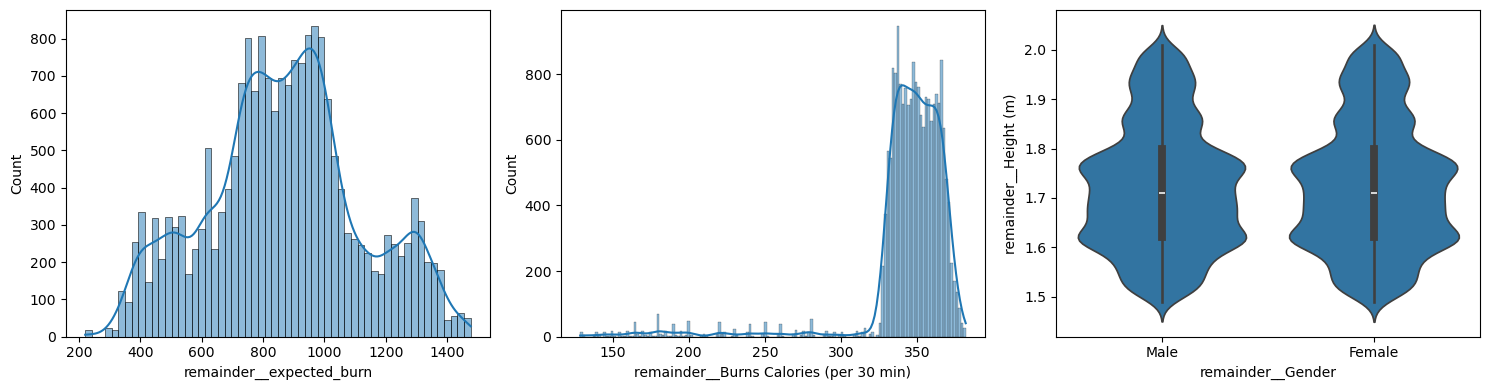

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_encoded['remainder__expected_burn'], kde=True, ax=axes[0],)
sns.histplot(df_encoded['remainder__Burns Calories (per 30 min)'], kde=True, ax=axes[1])
sns.violinplot(x=df_encoded['remainder__Gender'], y=df_encoded['remainder__Height (m)'], ax=axes[2])

plt.tight_layout()
plt.show()

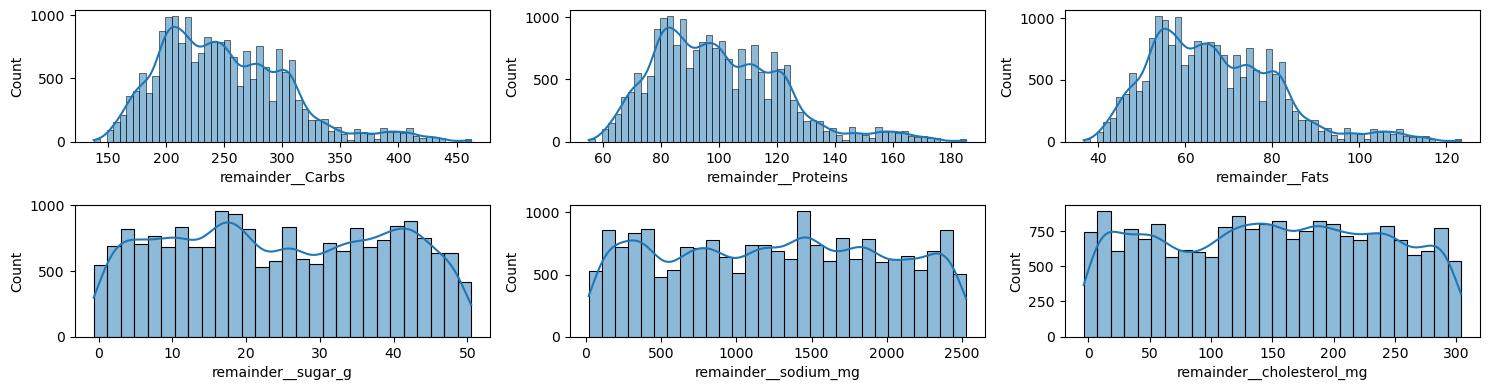

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 4))

sns.histplot(df_encoded['remainder__Carbs'], kde=True, ax=axes[0,0],)
sns.histplot(df_encoded['remainder__Proteins'], kde=True, ax=axes[0,1])
sns.histplot(df_encoded['remainder__Fats'],kde=True, ax=axes[0,2])


sns.histplot(df_encoded['remainder__sugar_g'], kde=True, ax=axes[1,0],)
sns.histplot(df_encoded['remainder__sodium_mg'], kde=True, ax=axes[1,1])
sns.histplot(df_encoded['remainder__cholesterol_mg'], kde=True, ax=axes[1,2])

plt.tight_layout()
plt.show()

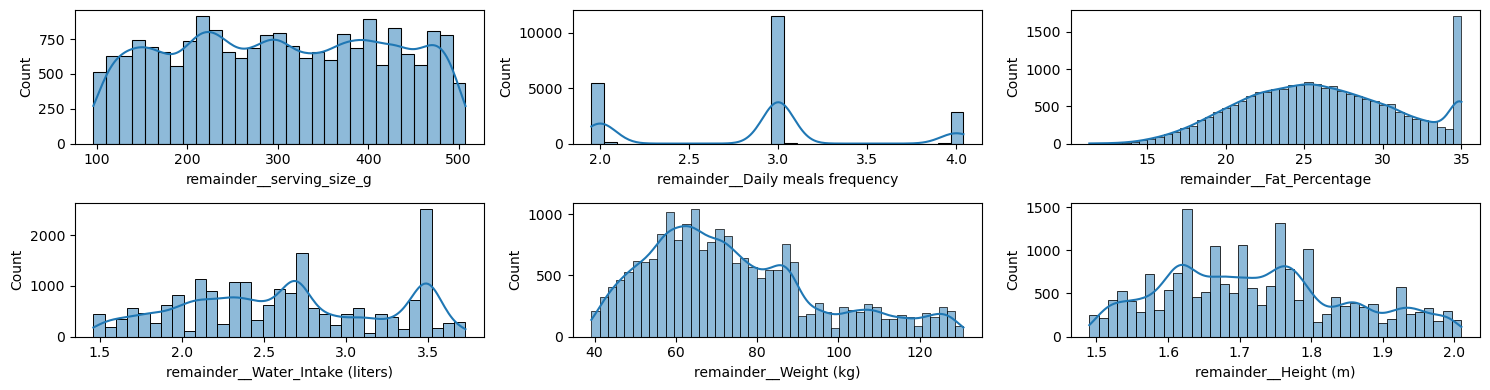

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 4))

sns.histplot(df_encoded['remainder__serving_size_g'], kde=True, ax=axes[0,0],)
sns.histplot(df_encoded['remainder__Daily meals frequency'], kde=True, ax=axes[0,1])
sns.histplot(df_encoded['remainder__Fat_Percentage'],kde=True, ax=axes[0,2])


sns.histplot(df_encoded['remainder__Water_Intake (liters)'], kde=True, ax=axes[1,0],)
sns.histplot(df_encoded['remainder__Weight (kg)'], kde=True, ax=axes[1,1])
sns.histplot(df_encoded['remainder__Height (m)'], kde=True, ax=axes[1,2])

plt.tight_layout()
plt.show()